Using device: cpu

Fold 1/2


/var/folders/mn/mv85f3qn4b3fq8hnthx7qfdm0000gn/T/ipykernel_79331/1538116847.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_x = torch.tensor(X[train_index], dtype=torch.float32).to(device)
/var/folders/mn/mv85f3qn4b3fq8hnthx7qfdm0000gn/T/ipykernel_79331/1538116847.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_y = torch.tensor(y[train_index], dtype=torch.float32).to(device)
/var/folders/mn/mv85f3qn4b3fq8hnthx7qfdm0000gn/T/ipykernel_79331/1538116847.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_x = torch.t

Epoch 1/40 - Loss: 1.1175
Epoch 2/40 - Loss: 1.0968
Epoch 3/40 - Loss: 1.0753
Epoch 4/40 - Loss: 1.0534
Epoch 5/40 - Loss: 1.0311
Epoch 6/40 - Loss: 1.0088
Epoch 7/40 - Loss: 0.9858
Epoch 8/40 - Loss: 0.9622
Epoch 9/40 - Loss: 0.9380
Epoch 10/40 - Loss: 0.9128
Epoch 11/40 - Loss: 0.8874
Epoch 12/40 - Loss: 0.8604
Epoch 13/40 - Loss: 0.8324
Epoch 14/40 - Loss: 0.8031
Epoch 15/40 - Loss: 0.7759
Epoch 16/40 - Loss: 0.7479
Epoch 17/40 - Loss: 0.7163
Epoch 18/40 - Loss: 0.6874
Epoch 19/40 - Loss: 0.6524
Epoch 20/40 - Loss: 0.6100
Epoch 21/40 - Loss: 0.5602
Epoch 22/40 - Loss: 0.5055
Epoch 23/40 - Loss: 0.4498
Epoch 24/40 - Loss: 0.3864
Epoch 25/40 - Loss: 0.3102
Epoch 26/40 - Loss: 0.2432
Epoch 27/40 - Loss: 0.1792
Epoch 28/40 - Loss: 0.1225
Epoch 29/40 - Loss: 0.0651
Epoch 30/40 - Loss: 0.0382
Epoch 31/40 - Loss: -0.0048
Epoch 32/40 - Loss: 0.0016
Epoch 33/40 - Loss: -0.0224
Epoch 34/40 - Loss: -0.0431
Epoch 35/40 - Loss: -0.0865
Epoch 36/40 - Loss: -0.0580
Epoch 37/40 - Loss: -0.0834
Epoc

/var/folders/mn/mv85f3qn4b3fq8hnthx7qfdm0000gn/T/ipykernel_79331/1538116847.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_x = torch.tensor(X[train_index], dtype=torch.float32).to(device)
/var/folders/mn/mv85f3qn4b3fq8hnthx7qfdm0000gn/T/ipykernel_79331/1538116847.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_y = torch.tensor(y[train_index], dtype=torch.float32).to(device)
/var/folders/mn/mv85f3qn4b3fq8hnthx7qfdm0000gn/T/ipykernel_79331/1538116847.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_x = torch.t

Epoch 1/40 - Loss: 1.1149
Epoch 2/40 - Loss: 1.0935
Epoch 3/40 - Loss: 1.0712
Epoch 4/40 - Loss: 1.0481
Epoch 5/40 - Loss: 1.0245
Epoch 6/40 - Loss: 1.0010
Epoch 7/40 - Loss: 0.9770
Epoch 8/40 - Loss: 0.9529
Epoch 9/40 - Loss: 0.9280
Epoch 10/40 - Loss: 0.9027
Epoch 11/40 - Loss: 0.8770
Epoch 12/40 - Loss: 0.8515
Epoch 13/40 - Loss: 0.8249
Epoch 14/40 - Loss: 0.7974
Epoch 15/40 - Loss: 0.7683
Epoch 16/40 - Loss: 0.7410
Epoch 17/40 - Loss: 0.7111
Epoch 18/40 - Loss: 0.6792
Epoch 19/40 - Loss: 0.6448
Epoch 20/40 - Loss: 0.6040
Epoch 21/40 - Loss: 0.5609
Epoch 22/40 - Loss: 0.5058
Epoch 23/40 - Loss: 0.4567
Epoch 24/40 - Loss: 0.3965
Epoch 25/40 - Loss: 0.3229
Epoch 26/40 - Loss: 0.2509
Epoch 27/40 - Loss: 0.1775
Epoch 28/40 - Loss: 0.1004
Epoch 29/40 - Loss: 0.0535
Epoch 30/40 - Loss: 0.0405
Epoch 31/40 - Loss: -0.0054
Epoch 32/40 - Loss: -0.0340
Epoch 33/40 - Loss: -0.0397
Epoch 34/40 - Loss: -0.0460
Epoch 35/40 - Loss: -0.0307
Epoch 36/40 - Loss: -0.0737
Epoch 37/40 - Loss: -0.0831
Epo

/var/folders/mn/mv85f3qn4b3fq8hnthx7qfdm0000gn/T/ipykernel_79331/1538116847.py:110: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  final_model = best_fold_model(torch.tensor(X, dtype=torch.float32).to(device),
/var/folders/mn/mv85f3qn4b3fq8hnthx7qfdm0000gn/T/ipykernel_79331/1538116847.py:111: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(y, dtype=torch.float32).to(device),
/var/folders/mn/mv85f3qn4b3fq8hnthx7qfdm0000gn/T/ipykernel_79331/1538116847.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_x = torch.tensor(X[tr

Epoch 1/30 - Loss: 0.9869
Epoch 2/30 - Loss: 0.9407
Epoch 3/30 - Loss: 0.9013
Epoch 4/30 - Loss: 0.8622
Epoch 5/30 - Loss: 0.8237
Epoch 6/30 - Loss: 0.7849
Epoch 7/30 - Loss: 0.7447
Epoch 8/30 - Loss: 0.7015
Epoch 9/30 - Loss: 0.6560
Epoch 10/30 - Loss: 0.5974
Epoch 11/30 - Loss: 0.5507
Epoch 12/30 - Loss: 0.5027
Epoch 13/30 - Loss: 0.4659
Epoch 14/30 - Loss: 0.4396
Epoch 15/30 - Loss: 0.4230
Epoch 16/30 - Loss: 0.3774
Epoch 17/30 - Loss: 0.3611
Epoch 18/30 - Loss: 0.3161
Epoch 19/30 - Loss: 0.2727
Epoch 20/30 - Loss: 0.2196
Epoch 21/30 - Loss: 0.2452
Epoch 22/30 - Loss: 0.1911
Epoch 23/30 - Loss: 0.1004
Epoch 24/30 - Loss: 0.0633
Epoch 25/30 - Loss: 0.1654
Epoch 26/30 - Loss: -0.0124
Epoch 27/30 - Loss: 0.1153


/Users/edliao/miniconda/envs/research/lib/python3.10/site-packages/linear_operator/utils/linear_cg.py:338: NumericalWarning: CG terminated in 1000 iterations with average residual norm 1.9777934551239014 which is larger than the tolerance of 1 specified by linear_operator.settings.cg_tolerance. If performance is affected, consider raising the maximum number of CG iterations by running code in a linear_operator.settings.max_cg_iterations(value) context.
  warnings.warn(


Epoch 28/30 - Loss: 0.4239


/Users/edliao/miniconda/envs/research/lib/python3.10/site-packages/linear_operator/utils/linear_cg.py:338: NumericalWarning: CG terminated in 1000 iterations with average residual norm 1.3962126970291138 which is larger than the tolerance of 1 specified by linear_operator.settings.cg_tolerance. If performance is affected, consider raising the maximum number of CG iterations by running code in a linear_operator.settings.max_cg_iterations(value) context.
  warnings.warn(


Epoch 29/30 - Loss: 0.4082


/Users/edliao/miniconda/envs/research/lib/python3.10/site-packages/linear_operator/utils/linear_cg.py:338: NumericalWarning: CG terminated in 1000 iterations with average residual norm 1.9915785789489746 which is larger than the tolerance of 1 specified by linear_operator.settings.cg_tolerance. If performance is affected, consider raising the maximum number of CG iterations by running code in a linear_operator.settings.max_cg_iterations(value) context.
  warnings.warn(


Epoch 30/30 - Loss: 0.4493
Validation R² (Fold 1): 0.9531

Fold 2/2


/var/folders/mn/mv85f3qn4b3fq8hnthx7qfdm0000gn/T/ipykernel_79331/1538116847.py:49: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_x = torch.tensor(X[train_index], dtype=torch.float32).to(device)
/var/folders/mn/mv85f3qn4b3fq8hnthx7qfdm0000gn/T/ipykernel_79331/1538116847.py:50: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  train_y = torch.tensor(y[train_index], dtype=torch.float32).to(device)
/var/folders/mn/mv85f3qn4b3fq8hnthx7qfdm0000gn/T/ipykernel_79331/1538116847.py:51: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  val_x = torch.t

Epoch 1/30 - Loss: 0.9535
Epoch 2/30 - Loss: 0.9159
Epoch 3/30 - Loss: 0.8787
Epoch 4/30 - Loss: 0.8441
Epoch 5/30 - Loss: 0.8075
Epoch 6/30 - Loss: 0.7663
Epoch 7/30 - Loss: 0.7280
Epoch 8/30 - Loss: 0.6744
Epoch 9/30 - Loss: 0.6317
Epoch 10/30 - Loss: 0.5838
Epoch 11/30 - Loss: 0.5331
Epoch 12/30 - Loss: 0.5047
Epoch 13/30 - Loss: 0.4855
Epoch 14/30 - Loss: 0.4522
Epoch 15/30 - Loss: 0.4305
Epoch 16/30 - Loss: 0.3976
Epoch 17/30 - Loss: 0.3481
Epoch 18/30 - Loss: 0.3625
Epoch 19/30 - Loss: 0.2574
Epoch 20/30 - Loss: 0.2083
Epoch 21/30 - Loss: 0.1782
Epoch 22/30 - Loss: 0.1507
Epoch 23/30 - Loss: 0.3790
Epoch 24/30 - Loss: 0.3794
Epoch 25/30 - Loss: 0.0303
Epoch 26/30 - Loss: 0.3301
Epoch 27/30 - Loss: 0.0127
Epoch 28/30 - Loss: 0.3705


/Users/edliao/miniconda/envs/research/lib/python3.10/site-packages/linear_operator/utils/linear_cg.py:338: NumericalWarning: CG terminated in 1000 iterations with average residual norm 2.5044493675231934 which is larger than the tolerance of 1 specified by linear_operator.settings.cg_tolerance. If performance is affected, consider raising the maximum number of CG iterations by running code in a linear_operator.settings.max_cg_iterations(value) context.
  warnings.warn(


Epoch 29/30 - Loss: 0.4243
Epoch 30/30 - Loss: 0.3362


/Users/edliao/miniconda/envs/research/lib/python3.10/site-packages/linear_operator/utils/linear_cg.py:338: NumericalWarning: CG terminated in 1000 iterations with average residual norm 1.342292308807373 which is larger than the tolerance of 0.01 specified by linear_operator.settings.cg_tolerance. If performance is affected, consider raising the maximum number of CG iterations by running code in a linear_operator.settings.max_cg_iterations(value) context.
  warnings.warn(


Validation R² (Fold 2): -0.7627

Average R² across folds: 0.0952
Best R² across folds: 0.9531
Generated 29223 points with 500m resolution


/var/folders/mn/mv85f3qn4b3fq8hnthx7qfdm0000gn/T/ipykernel_79331/1538116847.py:114: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  final_model = best_fold_model(torch.tensor(X, dtype=torch.float32).to(device),
/var/folders/mn/mv85f3qn4b3fq8hnthx7qfdm0000gn/T/ipykernel_79331/1538116847.py:115: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(y, dtype=torch.float32).to(device),
/Users/edliao/miniconda/envs/research/lib/python3.10/site-packages/linear_operator/utils/linear_cg.py:338: NumericalWarning: CG terminated in 1000 iterations with average residual norm 1.3454220294952393 which is larger than the tolerance of 0.01 specified by linear_operator.settings.cg_tolerance. If perfor

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

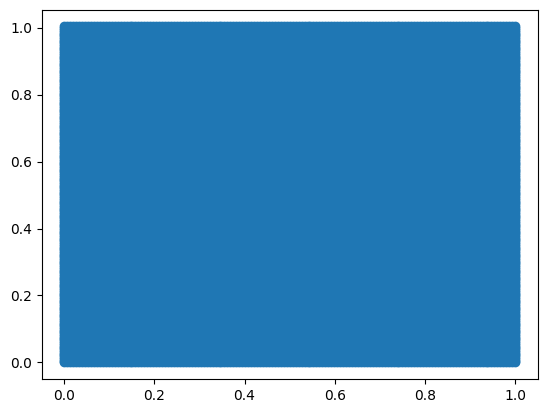

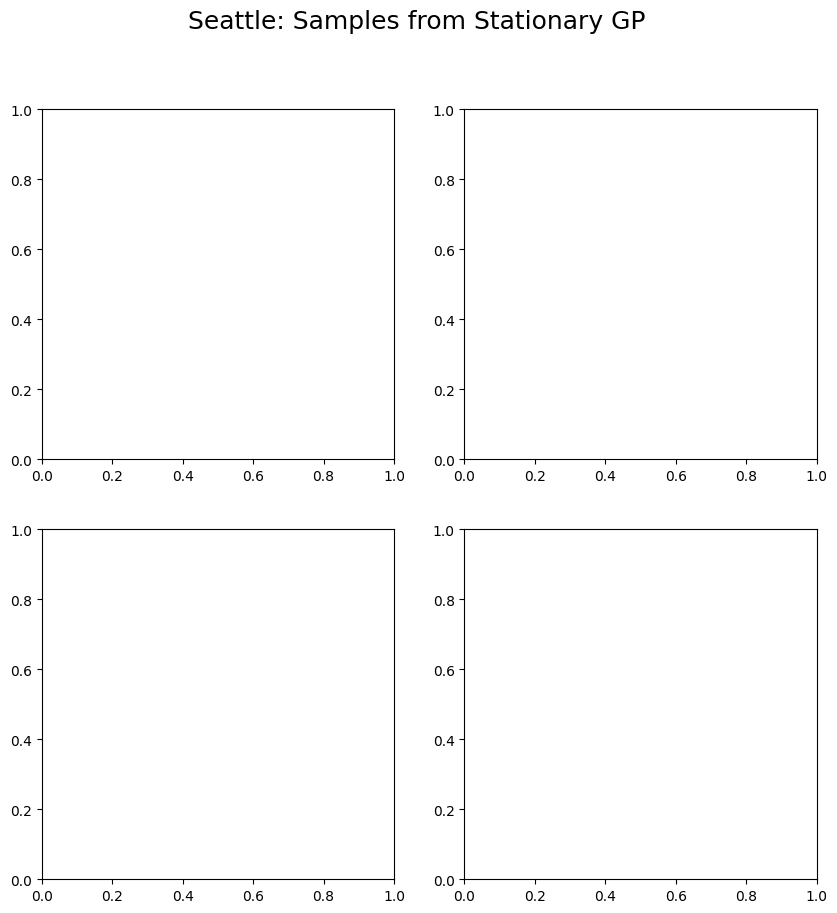

In [ ]:
import argparse
import logging
import os
import geopandas as gpd
import pandas as pd
import numpy as np
import torch
import gpytorch
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

import sys
import os

# Add the parent directory to the Python path
sys.path.append(os.path.abspath("../src"))

# Now import the models
from models import NonStationaryGPModel, ExactGPModel

def get_temperature_column(gdf):
    # List of potential column names for temperature
    possible_columns = ["temp", "temp_f", "t_f", "T", "T_F"]  # Update this list as needed

    # Check if any of these columns exist in the GeoDataFrame
    for col in possible_columns:
        if col in gdf.columns:
            return col

    # Raise an error if none are found
    raise ValueError("No temperature column found in the GeoDataFrame.")

def train_model(X, y, model_str='ExactGP', num_points=16, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    fold_scores = []

    best_val_score = -float('inf')  # Initialize for max R²
    best_model_weights = None
    best_likelihood_weights = None
    best_fold_model = None
    best_fold_likelihood = None

    for fold, (train_index, val_index) in enumerate(kf.split(X)):
        print(f"\nFold {fold+1}/{n_splits}")

        # Move data to device
        train_x = torch.tensor(X[train_index], dtype=torch.float32).to(device)
        train_y = torch.tensor(y[train_index], dtype=torch.float32).to(device)
        val_x = torch.tensor(X[val_index], dtype=torch.float32).to(device)
        val_y = torch.tensor(y[val_index], dtype=torch.float32).to(device)

        # Initialize likelihood & model
        likelihood = gpytorch.likelihoods.GaussianLikelihood().to(device)
        # likelihood = gpytorch.likelihoods.StudentTLikelihood()
        if model_str == 'ExactGP':
            model = ExactGPModel(train_x, train_y, likelihood).to(device)
            EPOCHS = 40
        elif model_str == 'NonStationaryGP':
            model = NonStationaryGPModel(train_x, train_y, likelihood, num_points=num_points).to(device)
            EPOCHS = 30

        model.train()
        likelihood.train()

        optimizer = torch.optim.Adam(model.parameters(), lr=0.1)
        mll = gpytorch.mlls.ExactMarginalLogLikelihood(likelihood, model)

        best_train_loss = float('inf')
        best_model_state = None

        for i in range(EPOCHS):
            optimizer.zero_grad()
            output = model(train_x)
            loss = -mll(output, train_y)
            loss.backward()
            optimizer.step()

            print(f"Epoch {i+1}/{EPOCHS} - Loss: {loss.item():.4f}")
            if loss.item() < best_train_loss:
                best_train_loss = loss.item()
                best_model_state = model.state_dict()

        # Evaluate on validation set
        model.load_state_dict(best_model_state)
        model.eval()
        likelihood.eval()

        with torch.no_grad(), gpytorch.settings.fast_pred_var():
            val_pred = likelihood(model(val_x)).mean
            val_r2 = r2_score(val_y.cpu().numpy(), val_pred.cpu().numpy())
            print(f"Validation R² (Fold {fold+1}): {val_r2:.4f}")
            fold_scores.append(val_r2)

            # Track the best-performing model
            if val_r2 > best_val_score:
                best_val_score = val_r2
                best_model_weights = best_model_state
                best_likelihood_weights = likelihood.state_dict()
                best_fold_model = model.__class__  # Save class to reinitialize later
                best_fold_likelihood = likelihood.__class__

    print(f"\nAverage R² across folds: {np.mean(fold_scores):.4f}")
    print(f"Best R² across folds: {best_val_score:.4f}")

    # Re-initialize and load best model and likelihood
    final_likelihood = best_fold_likelihood().to(device)
    if model_str == 'ExactGP':
        final_model = best_fold_model(torch.tensor(X, dtype=torch.float32).to(device),
                                  torch.tensor(y, dtype=torch.float32).to(device),
                                  final_likelihood).to(device)
    elif model_str == 'NonStationaryGP':
        final_model = best_fold_model(torch.tensor(X, dtype=torch.float32).to(device),
                                  torch.tensor(y, dtype=torch.float32).to(device),
                                  final_likelihood, num_points=num_points).to(device)
    final_model.load_state_dict(best_model_weights)
    final_likelihood.load_state_dict(best_likelihood_weights)

    return final_model

def generate_predictions(model, likelihood, points, num_samples=4, y_mean=0.0, y_std=1.0):
    """
    Generate 1 mean and `num_samples` sampled predictions from the posterior.
    Applies unnormalization using provided mean and std of original y.

    Returns:
        mean_pred: [num_points]
        sample_preds: [num_samples, num_points]
    """
    model.eval()
    likelihood.eval()

    with torch.no_grad(), gpytorch.settings.fast_pred_var():
        predictive_dist = likelihood(model(points))  # GP predictive distribution

        # Posterior mean (unnormalized)
        mean_pred = predictive_dist.mean.cpu().numpy() * y_std + y_mean

        # Posterior samples (unnormalized)
        sample_preds = predictive_dist.rsample(torch.Size([num_samples]))  # [num_samples, num_points]
        sample_preds = sample_preds.cpu().numpy() * y_std + y_mean

    return mean_pred, sample_preds

city = 'Seattle'
gdf = gpd.read_file(f'../data/shapefiles/{city}/pm_trav.shp')
gdf = gdf.to_crs(epsg=3857) # in meters
bounds = gdf.total_bounds

gdf['x'] = gdf.geometry.x
gdf['y'] = gdf.geometry.y
coordinates = gdf[['x', 'y']].to_numpy()
temperature_column = get_temperature_column(gdf)
gdf['t_f'] = gdf[temperature_column]  # Use the identified temperature column
gdf['t_f'] = gdf['t_f'].astype(float)  # Ensure the temperature column is float

X, y = coordinates, (gdf.t_f.to_numpy() - 32) * 5.0 / 9.0 # convert to celsius

# Now, we need to standardize the data for the final fit
x_shift = X.min(axis=0)
x_scale = X.max(axis=0) - X.min(axis=0)

# Add in a small number 1e-8 to prevent divide by zero errors
x_norm = (X - x_shift) / (x_scale + 1e-16)

# Standardize the labels
y_mean = y.mean()
y_std = y.std()

y_norm = (y - y_mean) / (y_std)

random_indices = np.random.choice(len(X), size=10000, replace=False)
x_tensor, y_tensor = torch.tensor(x_norm[random_indices]), torch.tensor(y_norm[random_indices])

# Set device: use CUDA if available, fallback to CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Train the GP model
exact_gp_model = train_model(x_tensor, y_tensor, 'ExactGP', n_splits=2)
print('\n')
ns_gp_model = train_model(x_tensor, y_tensor,'NonStationaryGP', num_points=9, n_splits=2)

# Bounding box coordinates in kilometers
xmin, ymin, xmax, ymax = bounds

resolution = 500 # meters

# Generate coordinate grid
x_coords = np.arange(xmin, xmax + resolution, resolution)
x_coords_norm = (x_coords - x_shift[0]) / (x_scale[0] + 1e-16)
y_coords = np.arange(ymin, ymax + resolution, resolution)
y_coords_norm = (y_coords - x_shift[1]) / (x_scale[1] + 1e-16)
X, Y = np.meshgrid(x_coords_norm, y_coords_norm)

# Combine into (N, 2) array of 2D points
points = np.vstack([X.ravel(), Y.ravel()]).T

print(f"Generated {points.shape[0]} points with {int(resolution)}m resolution")

points = torch.tensor(points, dtype=torch.float32)
likelihood = gpytorch.likelihoods.GaussianLikelihood()

# Generate predictions for sampled points
mean_pred_ex, sample_preds_ex = generate_predictions(exact_gp_model, likelihood, points, num_samples=3, y_std=y_std, y_mean=y_mean)
mean_pred_ns, sample_preds_ns = generate_predictions(ns_gp_model, likelihood, points, num_samples=3, y_std=y_std, y_mean=y_mean)

# Necessary transformations to plot the results
ex_gp_sample0 = np.flipud(mean_pred_ex.reshape(len(y_coords), len(x_coords)))
ex_gp_samples = []
for i in range(sample_preds_ex.shape[0]):
    ex_gp_samples.append(np.flipud(sample_preds_ex[i].reshape(len(y_coords), len(x_coords))))
ns_gp_sample0 = np.flipud(mean_pred_ns.reshape(len(y_coords), len(x_coords)))
ns_gp_samples = []
for i in range(sample_preds_ns.shape[0]):
    ns_gp_samples.append(np.flipud(sample_preds_ns[i].reshape(len(y_coords), len(x_coords))))

# Plot the results
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle(f'Samples from Stationary GP in {city}', fontsize=18)

# Plot the mean prediction
im0 = ax[0, 0].imshow(ex_gp_sample0, cmap="coolwarm")
ax[0, 0].set_title('Mean')
ax[0, 0].axis('off')
colorbar = fig.colorbar(im0, ax=ax[0, 0])
colorbar.set_label('Temperature (C)', rotation=270, labelpad=15)

# Plot sample 1
im1 = ax[0, 1].imshow(ex_gp_samples[0], cmap="coolwarm")
ax[0, 1].set_title('Sample 1')
ax[0, 1].axis('off')
colorbar = fig.colorbar(im1, ax=ax[0, 1])
colorbar.set_label('Temperature (C)', rotation=270, labelpad=15)

# Plot sample 2
im2 = ax[1, 0].imshow(ex_gp_samples[1], cmap="coolwarm")
ax[1, 0].set_title('Sample 2')
ax[1, 0].axis('off')
colorbar = fig.colorbar(im2, ax=ax[1, 0])
colorbar.set_label('Temperature (C)', rotation=270, labelpad=15)

# Plot sample 3
im3 = ax[1, 1].imshow(ex_gp_samples[2], cmap="coolwarm")
ax[1, 1].set_title('Sample 3')
ax[1, 1].axis('off')
colorbar = fig.colorbar(im3, ax=ax[1, 1])
colorbar.set_label('Temperature (C)', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

# Plot the results
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle(f'Samples from Non-stationary GP in {city}', fontsize=18)

# Plot the mean prediction
im0 = ax[0, 0].imshow(ns_gp_sample0, cmap="coolwarm")
ax[0, 0].set_title('Mean')
ax[0, 0].axis('off')
colorbar = fig.colorbar(im0, ax=ax[0, 0])
colorbar.set_label('Temperature (C)', rotation=270, labelpad=15)

# Plot sample 1
im1 = ax[0, 1].imshow(ns_gp_samples[0], cmap="coolwarm")
ax[0, 1].set_title('Sample 1')
ax[0, 1].axis('off')
colorbar = fig.colorbar(im1, ax=ax[0, 1])
colorbar.set_label('Temperature (C)', rotation=270, labelpad=15)

# Plot sample 2
im2 = ax[1, 0].imshow(ns_gp_samples[1], cmap="coolwarm")
ax[1, 0].set_title('Sample 2')
ax[1, 0].axis('off')
colorbar = fig.colorbar(im2, ax=ax[1, 0])
colorbar.set_label('Temperature (C)', rotation=270, labelpad=15)

# Plot sample 3
im3 = ax[1, 1].imshow(ns_gp_samples[2], cmap="coolwarm")
ax[1, 1].set_title('Sample 3')
ax[1, 1].axis('off')
colorbar = fig.colorbar(im3, ax=ax[1, 1])
colorbar.set_label('Temperature (C)', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

In [15]:
ex_gp_sample0.shape

(191, 153)

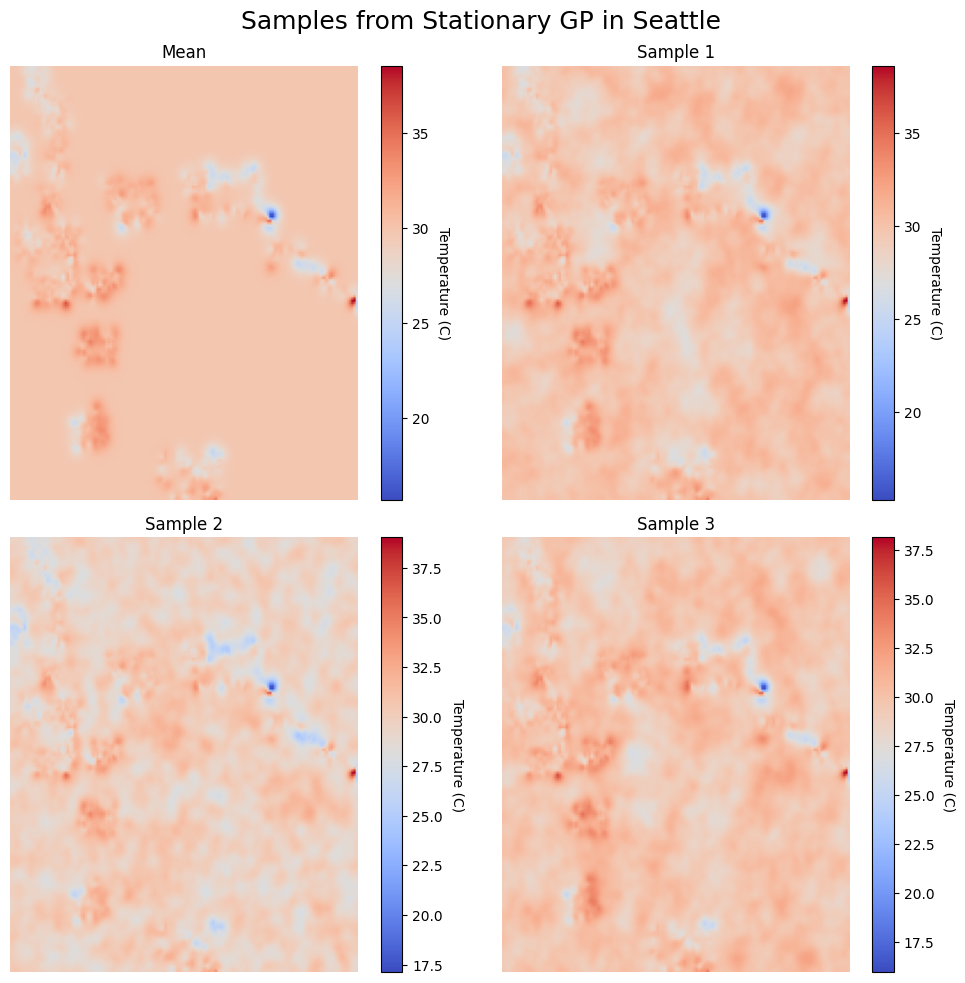

In [20]:
# Plot the results
fig, ax = plt.subplots(2, 2, figsize=(10, 10))
fig.suptitle(f'Samples from Stationary GP in {city}', fontsize=18)

# Plot the mean prediction
im0 = ax[0, 0].imshow(ex_gp_sample0, cmap="coolwarm")
ax[0, 0].set_title('Mean')
ax[0, 0].axis('off')
colorbar = fig.colorbar(im0, ax=ax[0, 0])
colorbar.set_label('Temperature (C)', rotation=270, labelpad=15)

# Plot sample 1
im1 = ax[0, 1].imshow(ex_gp_samples[0], cmap="coolwarm")
ax[0, 1].set_title('Sample 1')
ax[0, 1].axis('off')
colorbar = fig.colorbar(im1, ax=ax[0, 1])
colorbar.set_label('Temperature (C)', rotation=270, labelpad=15)

# Plot sample 2
im2 = ax[1, 0].imshow(ex_gp_samples[1], cmap="coolwarm")
ax[1, 0].set_title('Sample 2')
ax[1, 0].axis('off')
colorbar = fig.colorbar(im2, ax=ax[1, 0])
colorbar.set_label('Temperature (C)', rotation=270, labelpad=15)

# Plot sample 3
im3 = ax[1, 1].imshow(ex_gp_samples[2], cmap="coolwarm")
ax[1, 1].set_title('Sample 3')
ax[1, 1].axis('off')
colorbar = fig.colorbar(im3, ax=ax[1, 1])
colorbar.set_label('Temperature (C)', rotation=270, labelpad=15)

plt.tight_layout()
plt.show()

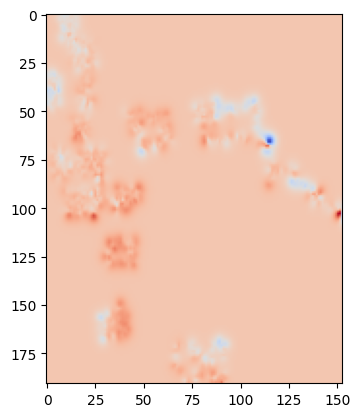

In [ ]:
plt.imshow(ex_gp_sample0, cmap = "coolwarm")